In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import csv
from scipy.optimize import *
from numpy.lib.recfunctions import *
from utils import *
from data import *

In [2]:
# Print data columns
x.dtype.names

('measure_new_score',
 'classification',
 'classification_longliner',
 'classification_purse_seine',
 'speed',
 'measure_coursestddev',
 'measure_speedstddev',
 'measure_speedavg',
 'distance_to_shore')

Error for measure_new_score: 42.1735850097%
False positives for measure_new_score: 15.0816005019%


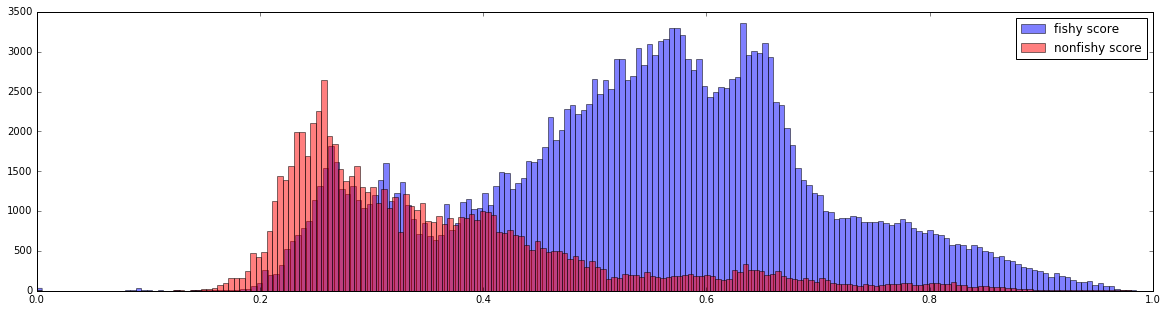

In [4]:
histfig = figure(figsize=(20,5))
subplot = histfig.add_subplot(111)
new_score_fishy = subplot.hist(xfishy["measure_new_score"][xfishy['distance_to_shore'] > 3], bins=200, normed=False, color='b', alpha=0.5, label="fishy score")
new_score_nonfishy = subplot.hist(xnonfishy["measure_new_score"][xnonfishy['distance_to_shore'] > 3], bins=200, normed=False, color='r', alpha=0.5, label="nonfishy score")
legend()

total = sum(new_score_fishy[0] + new_score_nonfishy[0])
non_overlap = sum(abs(new_score_fishy[0] - new_score_nonfishy[0]))
overlap = total - non_overlap
error = overlap / total

print "Error for measure_new_score: %s%%" % (error * 100)

cutoff = len(new_score_fishy[1][new_score_fishy[1] < 0.5])
total = sum(new_score_fishy[0][cutoff:] + new_score_nonfishy[0][cutoff:])
non_overlap = sum(abs(new_score_fishy[0][cutoff:] - new_score_nonfishy[0][cutoff:]))
overlap = total - non_overlap
error = overlap / total

print "False positives for measure_new_score: %s%%" % (error * 100)


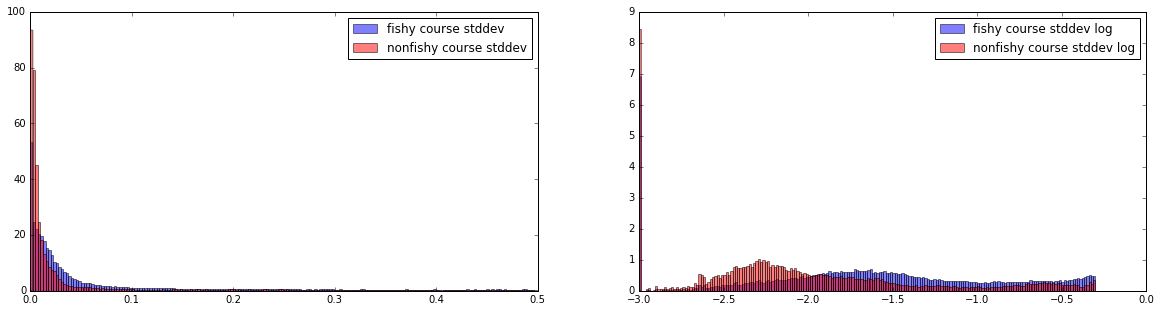

In [22]:
histfig = figure(figsize=(20,5))
subplot = histfig.add_subplot(121)
subplot.hist(xfishy["measure_coursestddev"], bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev")
subplot.hist(xnonfishy["measure_coursestddev"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev")
legend()

subplot = histfig.add_subplot(122)
subplot.hist(log10(xfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log")
subplot.hist(log10(xnonfishy["measure_coursestddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log")
legend()
show()


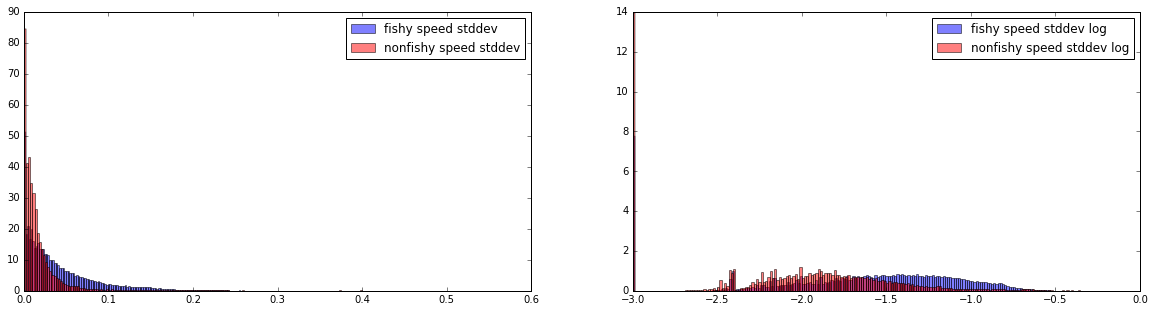

In [26]:
histfig = figure(figsize=(20,5))
subplot = histfig.add_subplot(121)
subplot.hist(xfishy["measure_speedstddev"], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed stddev")
subplot.hist(xnonfishy["measure_speedstddev"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed stddev")
legend()

subplot = histfig.add_subplot(122)
subplot.hist(log10(xfishy["measure_speedstddev"]+0.001), bins=200, normed=True, color='b', alpha=0.5, label="fishy speed stddev log")
subplot.hist(log10(xnonfishy["measure_speedstddev"]+0.001), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed stddev log")
legend()
show()

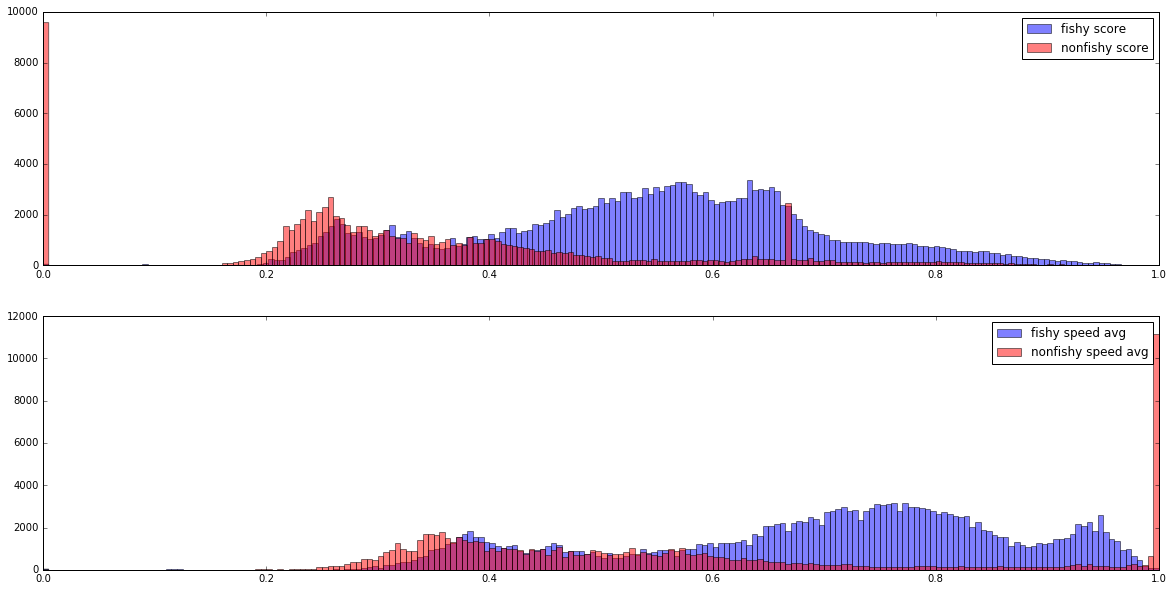

In [34]:
histfig = figure(figsize=(20,10))
subplot = histfig.add_subplot(211)
subplot.hist(xfishy["measure_new_score"], bins=200, normed=False, color='b', alpha=0.5, label="fishy score")
subplot.hist(xnonfishy["measure_new_score"], bins=200, normed=False, color='r', alpha=0.5, label="nonfishy score")
legend()

subplot = histfig.add_subplot(212)
xfishy_speed_clamp = clamp(xfishy["measure_speedavg"], 0, 1)
xnonfishy_speed_clamp = clamp(xnonfishy["measure_speedavg"], 0, 1)
subplot.hist(xfishy_speed_clamp, bins=200, normed=False, color='b', alpha=0.5, label="fishy speed avg")
subplot.hist(xnonfishy_speed_clamp, bins=200, normed=False, color='r', alpha=0.5, label="nonfishy speed avg")
legend()

show()

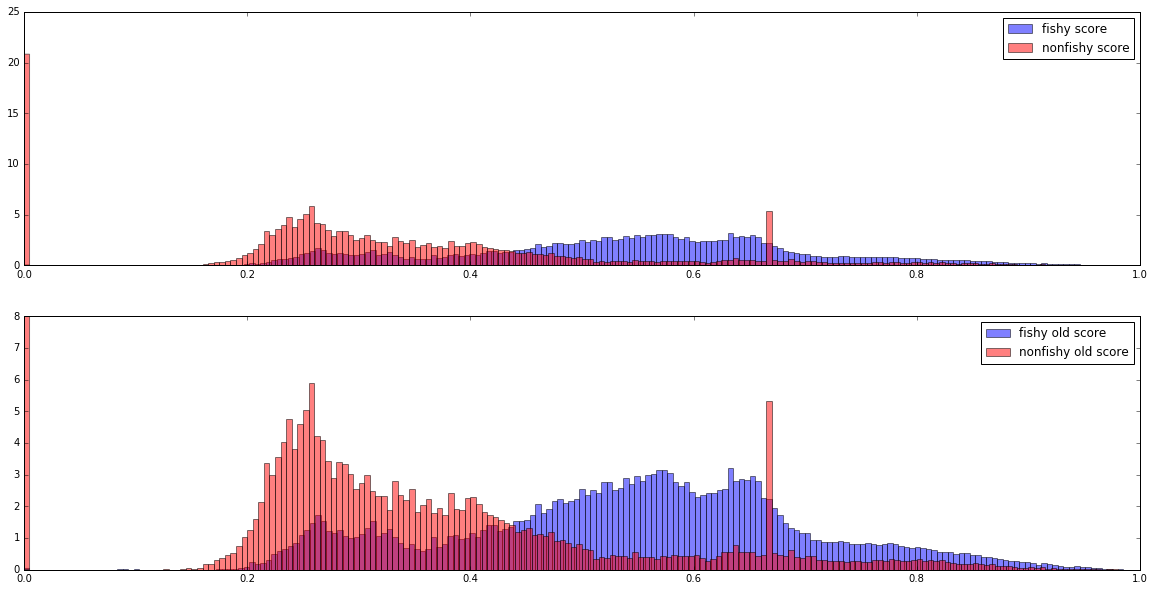

In [6]:
xfishy_score_recalc = clamp(where(xfishy["distance_to_shore"] < 3, 0, (xfishy["measure_coursestddev"]+xfishy["measure_speedstddev"]+xfishy["measure_speedavg"])*2./3.), 0, 1)
xnonfishy_score_recalc = clamp(where(xnonfishy["distance_to_shore"] < 3, 0, (xnonfishy["measure_coursestddev"]+xnonfishy["measure_speedstddev"]+xnonfishy["measure_speedavg"])*2./3.), 0, 1)


histfig = figure(figsize=(20,10))

subplot = histfig.add_subplot(211)
subplot.hist(xfishy_score_recalc, bins=200, normed=True, color='b', alpha=0.5, label="fishy score")
subplot.hist(xnonfishy_score_recalc, bins=200, normed=True, color='r', alpha=0.5, label="nonfishy score")
legend()

subplot = histfig.add_subplot(212)
subplot.hist(xfishy["measure_new_score"], bins=200, normed=True, color='b', alpha=0.5, label="fishy old score")
subplot.hist(xnonfishy["measure_new_score"], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy old score")
subplot.set_ylim(0., 8.)
legend()

show()

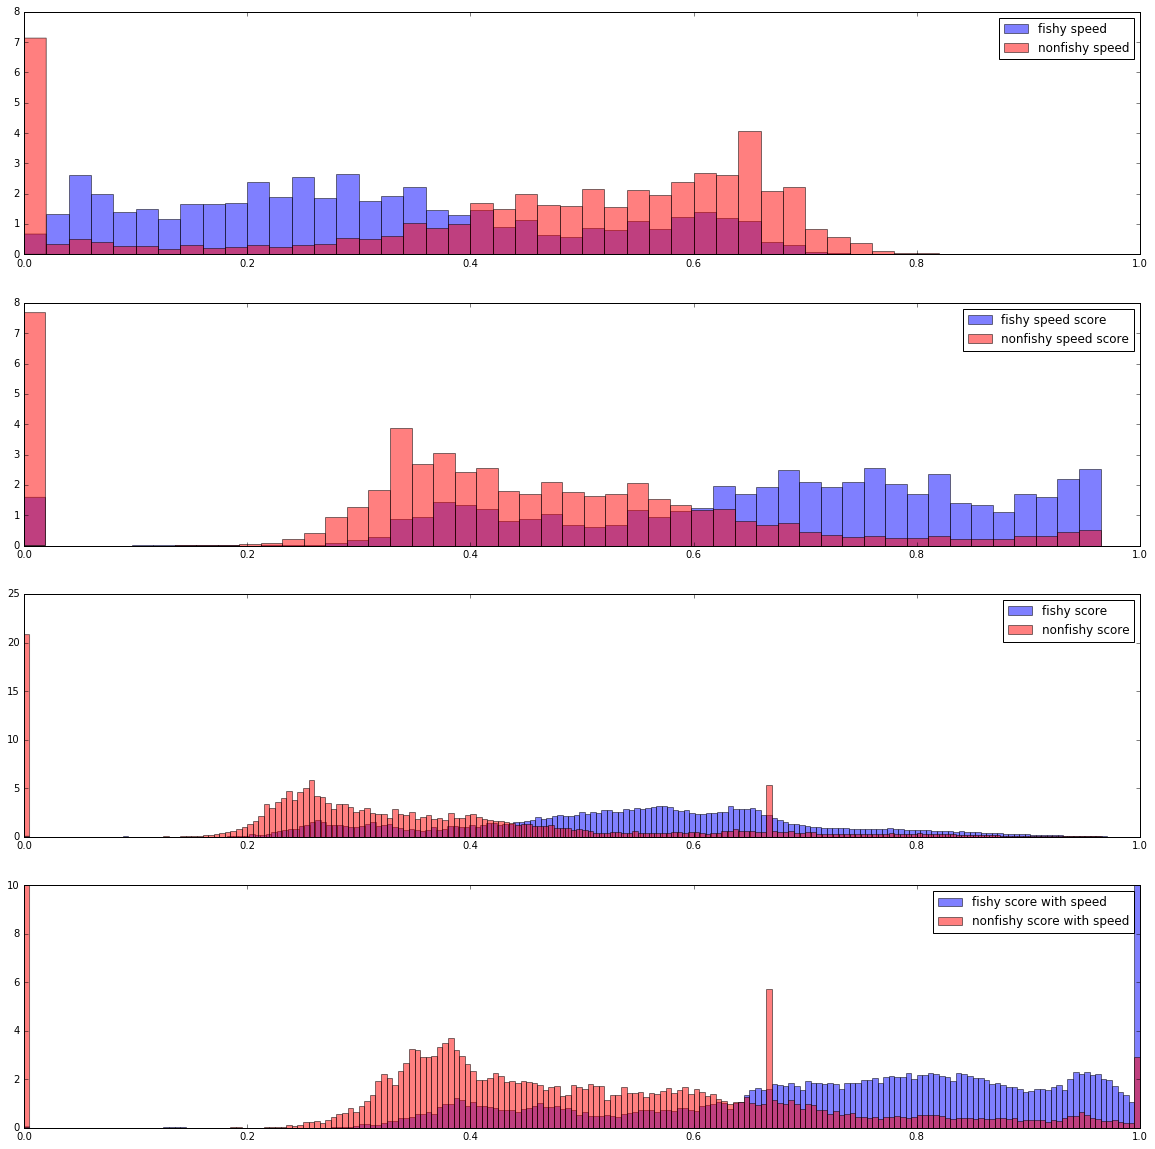

In [7]:
histfig = figure(figsize=(20,20))

subplot = histfig.add_subplot(411)
subplot.hist(clamp(xfishy["speed"]/17, 0, 1), bins=50, normed=True, color='b', alpha=0.5, label="fishy speed")
subplot.hist(clamp(xnonfishy["speed"]/17, 0, 1), bins=50, normed=True, color='r', alpha=0.5, label="nonfishy speed")
legend()

xfishy_speedscore = where(xfishy["speed"] > 0.5, 1.0 - clamp(xfishy["speed"]/17, 0, 1), 0)
xnonfishy_speedscore = where(xnonfishy["speed"] > 0.5, 1.0 - clamp(xnonfishy["speed"]/17, 0, 1), 0)

subplot = histfig.add_subplot(412)
subplot.hist(xfishy_speedscore, bins=50, normed=True, color='b', alpha=0.5, label="fishy speed score")
subplot.hist(xnonfishy_speedscore, bins=50, normed=True, color='r', alpha=0.5, label="nonfishy speed score")
legend()

subplot = histfig.add_subplot(413)
subplot.hist(xfishy_score_recalc, bins=200, normed=True, color='b', alpha=0.5, label="fishy score")
subplot.hist(xnonfishy_score_recalc, bins=200, normed=True, color='r', alpha=0.5, label="nonfishy score")
legend()

subplot = histfig.add_subplot(414)
subplot.hist(clamp(where(xfishy["distance_to_shore"] < 3, 0, (xfishy["measure_coursestddev"]+xfishy["measure_speedstddev"]+xfishy["measure_speedavg"]+xfishy_speedscore/2)*2./3.), 0, 1), bins=200, normed=True, color='b', alpha=0.5, label="fishy score with speed")
subplot.hist(clamp(where(xnonfishy["distance_to_shore"] < 3, 0, (xnonfishy["measure_coursestddev"]+xnonfishy["measure_speedstddev"]+xnonfishy["measure_speedavg"]+xnonfishy_speedscore/2)*2./3.), 0, 1), bins=200, normed=True, color='r', alpha=0.5, label="nonfishy score with speed")
subplot.set_ylim(0., 10)
legend()


show()

In [5]:
try:
    x = append_fields(x, 'score_speed', [], dtypes='<f8', fill_value=0.0)
    x = append_fields(x, 'score_speedavg', [], dtypes='<f8', fill_value=0.0)
    x = append_fields(x, 'score_speedstddev', [], dtypes='<f8', fill_value=0.0)
    x = append_fields(x, 'score_coursestddev', [], dtypes='<f8', fill_value=0.0)
except:
    pass

x['score_speed'][:] = polynomial(clamp(x["speed"]/17, 0, 1), *speed_args)
x['score_speedavg'][:] = polynomial(x["measure_speedavg"], *measure_speedavg_args)
x['score_speedstddev'][:] = polynomial(log10(x["measure_speedstddev"]+0.001), *measure_speedstddev_args)
x['score_coursestddev'][:] = polynomial(log10(x["measure_coursestddev"]+0.001), *measure_coursestddev_args)

xfishy = fishy(x)
xnonfishy = nonfishy(x)

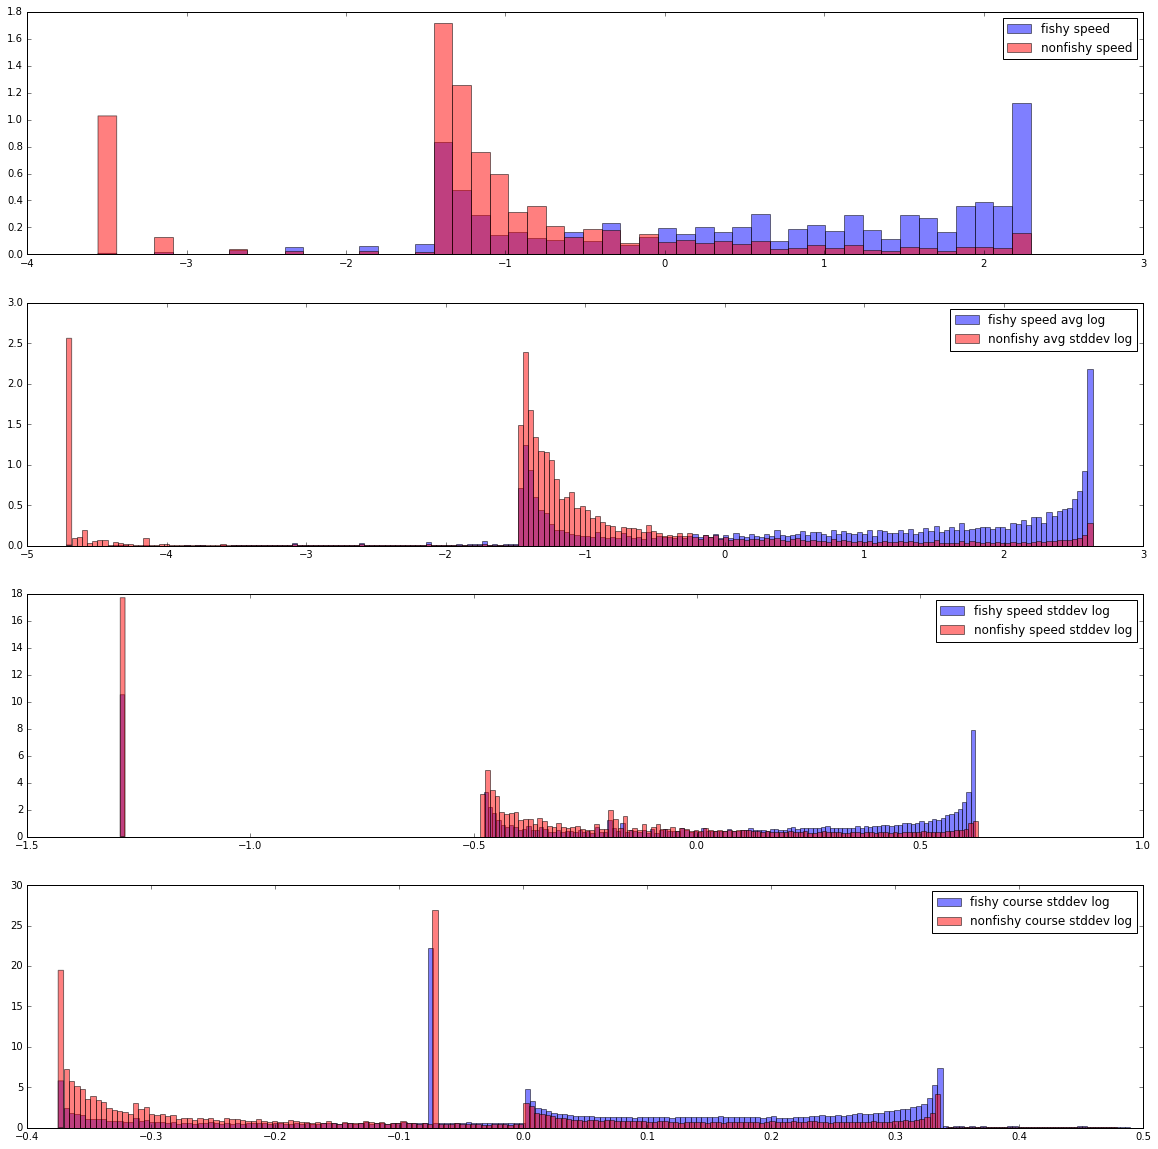

In [6]:
histfix = figure(figsize=(20,20))

histfix.add_subplot(411)
hist(xfishy['score_speed'], bins=50, normed=True, color='b', alpha=0.5, label="fishy speed")
hist(xnonfishy['score_speed'], bins=50, normed=True, color='r', alpha=0.5, label="nonfishy speed")
legend()

histfix.add_subplot(412)
hist(xfishy['score_speedavg'], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed avg log")
hist(xnonfishy['score_speedavg'], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy avg stddev log")
legend()

histfix.add_subplot(413)
hist(xfishy['score_speedstddev'], bins=200, normed=True, color='b', alpha=0.5, label="fishy speed stddev log")
hist(xnonfishy['score_speedstddev'], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy speed stddev log")
legend()

histfix.add_subplot(414)
hist(xfishy['score_coursestddev'], bins=200, normed=True, color='b', alpha=0.5, label="fishy course stddev log")
hist(xnonfishy['score_coursestddev'], bins=200, normed=True, color='r', alpha=0.5, label="nonfishy course stddev log")
legend()
show()